In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import re
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

# Load the dataset
df = pd.read_csv('dataset_fast-linkedin-jobs-scraper_2025-09-30_04-48-34-346.csv')

print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())
print("\nFirst few rows:")
df.head()

Dataset Shape: (60, 18)

Column Names:
['company', 'companyDetails/industry', 'companyDetails/size', 'companyDetails/website', 'companyLink', 'description', 'employmentType', 'experienceLevel', 'industry', 'jobLink', 'jobType', 'location', 'postDate', 'publisher/email', 'publisher/name', 'salary', 'title', 'workplaceType']

First few rows:


,company,companyDetails/industry,companyDetails/size,companyDetails/website,companyLink,description,employmentType,experienceLevel,industry,jobLink,jobType,location,postDate,publisher/email,publisher/name,salary,title,workplaceType
0,Procter & Gamble,NaN,NaN,NaN,https://www.linkedin.com/company/procter-and-gamble?trk=public_jobs_jserp-result_job-search-card...,Job LocationHO CHI MINH CITY OFFICEJob DescriptionP&G is a leading global consumer goods company...,Toàn thời gian,Not Applicable,NaN,https://vn.linkedin.com/jobs/view/analytics-manager-at-procter-gamble-4279878981?position=1&page...,NaN,Ho Chi Minh City Metropolitan Area,2025-09-19,NaN,NaN,NaN,Analytics Manager,NaN
1,Google,NaN,NaN,NaN,https://www.linkedin.com/company/google?trk=public_jobs_jserp-result_job-search-card-subtitle,"Google will be prioritizing applicants who have a current right to work in Singapore, and do not...",Toàn thời gian,Mid-Senior level,NaN,https://vn.linkedin.com/jobs/view/head-of-analytical-leads-planning-and-measurement-at-google-43...,NaN,"Ho Chi Minh City, Ho Chi Minh City, Vietnam",2025-09-22,NaN,NaN,NaN,"Head of Analytical Leads, Planning and Measurement",NaN
2,HEINEKEN Vietnam,NaN,NaN,NaN,https://vn.linkedin.com/company/heinekenvietnam?trk=public_jobs_jserp-result_job-search-card-sub...,"As a Digital Product Intern at Heineken Vietnam, you will play a key supporting role in the deve...",Thực tập,Thực tập,NaN,https://vn.linkedin.com/jobs/view/digital-product-owner-intern-at-heineken-vietnam-4302169584?po...,NaN,"Ho Chi Minh City, Vietnam",2025-09-18,NaN,NaN,NaN,Digital Product Owner Intern,NaN
3,ĐÚNG NGƯỜI ĐÚNG VIỆC Community,NaN,NaN,NaN,https://vn.linkedin.com/company/dungnguoidungviec?trk=public_jobs_jserp-result_job-search-card-s...,"Mô tả công việcChúng tôi đang tìm kiếm một Kỹ sư Dữ liệu năng động, có ít nhất 1 năm kinh nghiệm...",Toàn thời gian,Entry level,NaN,https://vn.linkedin.com/jobs/view/data-analytics-at-%C4%91%C3%BAng-ng%C6%B0%E1%BB%9Di-%C4%91%C3%...,NaN,"Phường Chí Minh, Hai Duong, Vietnam",2025-09-23,NaN,NaN,NaN,Data Analytics,NaN
4,Expeditors,NaN,NaN,NaN,https://www.linkedin.com/company/expeditors?trk=public_jobs_jserp-result_job-search-card-subtitle,"Company DescriptionExpeditors is a global logistics company headquartered in Seattle, Washington...",Toàn thời gian,Entry level,NaN,https://vn.linkedin.com/jobs/view/agent-lead-agent-order-management-at-expeditors-4304886867?pos...,NaN,Ho Chi Minh City Metropolitan Area,2025-09-25,NaN,NaN,NaN,Agent/Lead Agent - Order Management,NaN


In [2]:
# Basic dataset information
print("Dataset Info:")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("\nData Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())
print("\nMemory Usage:")
print(df.memory_usage(deep=True).sum() / 1024, "KB")

Dataset Info:
Number of rows: 60
Number of columns: 18

Data Types:
company                     object
companyDetails/industry    float64
companyDetails/size        float64
companyDetails/website     float64
companyLink                 object
description                 object
employmentType              object
experienceLevel             object
industry                   float64
jobLink                     object
jobType                    float64
location                    object
postDate                    object
publisher/email            float64
publisher/name             float64
salary                     float64
title                       object
workplaceType              float64
dtype: object

Missing Values:
company                     0
companyDetails/industry    60
companyDetails/size        60
companyDetails/website     60
companyLink                 0
description                 0
employmentType              0
experienceLevel             0
industry                   60
j

In [3]:
# Analyze key categorical variables
print("=== COMPANY ANALYSIS ===")
print("Top 10 Companies:")
print(df['company'].value_counts().head(10))
print(f"\nTotal unique companies: {df['company'].nunique()}")

print("\n=== LOCATION ANALYSIS ===")
print("Top 10 Locations:")
print(df['location'].value_counts().head(10))
print(f"\nTotal unique locations: {df['location'].nunique()}")

print("\n=== EMPLOYMENT TYPE ANALYSIS ===")
print("Employment Types:")
print(df['employmentType'].value_counts())

print("\n=== EXPERIENCE LEVEL ANALYSIS ===")
print("Experience Levels:")
print(df['experienceLevel'].value_counts())

print("\n=== JOB TITLES ANALYSIS ===")
print("Top 10 Job Titles:")
print(df['title'].value_counts().head(10))

=== COMPANY ANALYSIS ===
Top 10 Companies:
company
Shopee                            7
ĐÚNG NGƯỜI ĐÚNG VIỆC Community    3
Procter & Gamble                  2
HEINEKEN Vietnam                  2
Unilever                          2
Mindrift                          2
Zalopay                           1
Carlsberg Group                   1
TechX Corp.                       1
Sucafina                          1
Name: count, dtype: int64

Total unique companies: 48

=== LOCATION ANALYSIS ===
Top 10 Locations:
location
Ho Chi Minh City, Vietnam                      15
Ho Chi Minh City, Ho Chi Minh City, Vietnam    14
Ho Chi Minh City Metropolitan Area              8
Vietnam                                         6
Phường Chí Minh, Hai Duong, Vietnam             2
Hanoi, Hanoi, Vietnam                           2
Hanoi Capital Region                            2
Thanh Tr, Bac Lieu, Vietnam                     1
Thuận An, Binh Duong, Vietnam                   1
District 3, Ho Chi Minh City, V

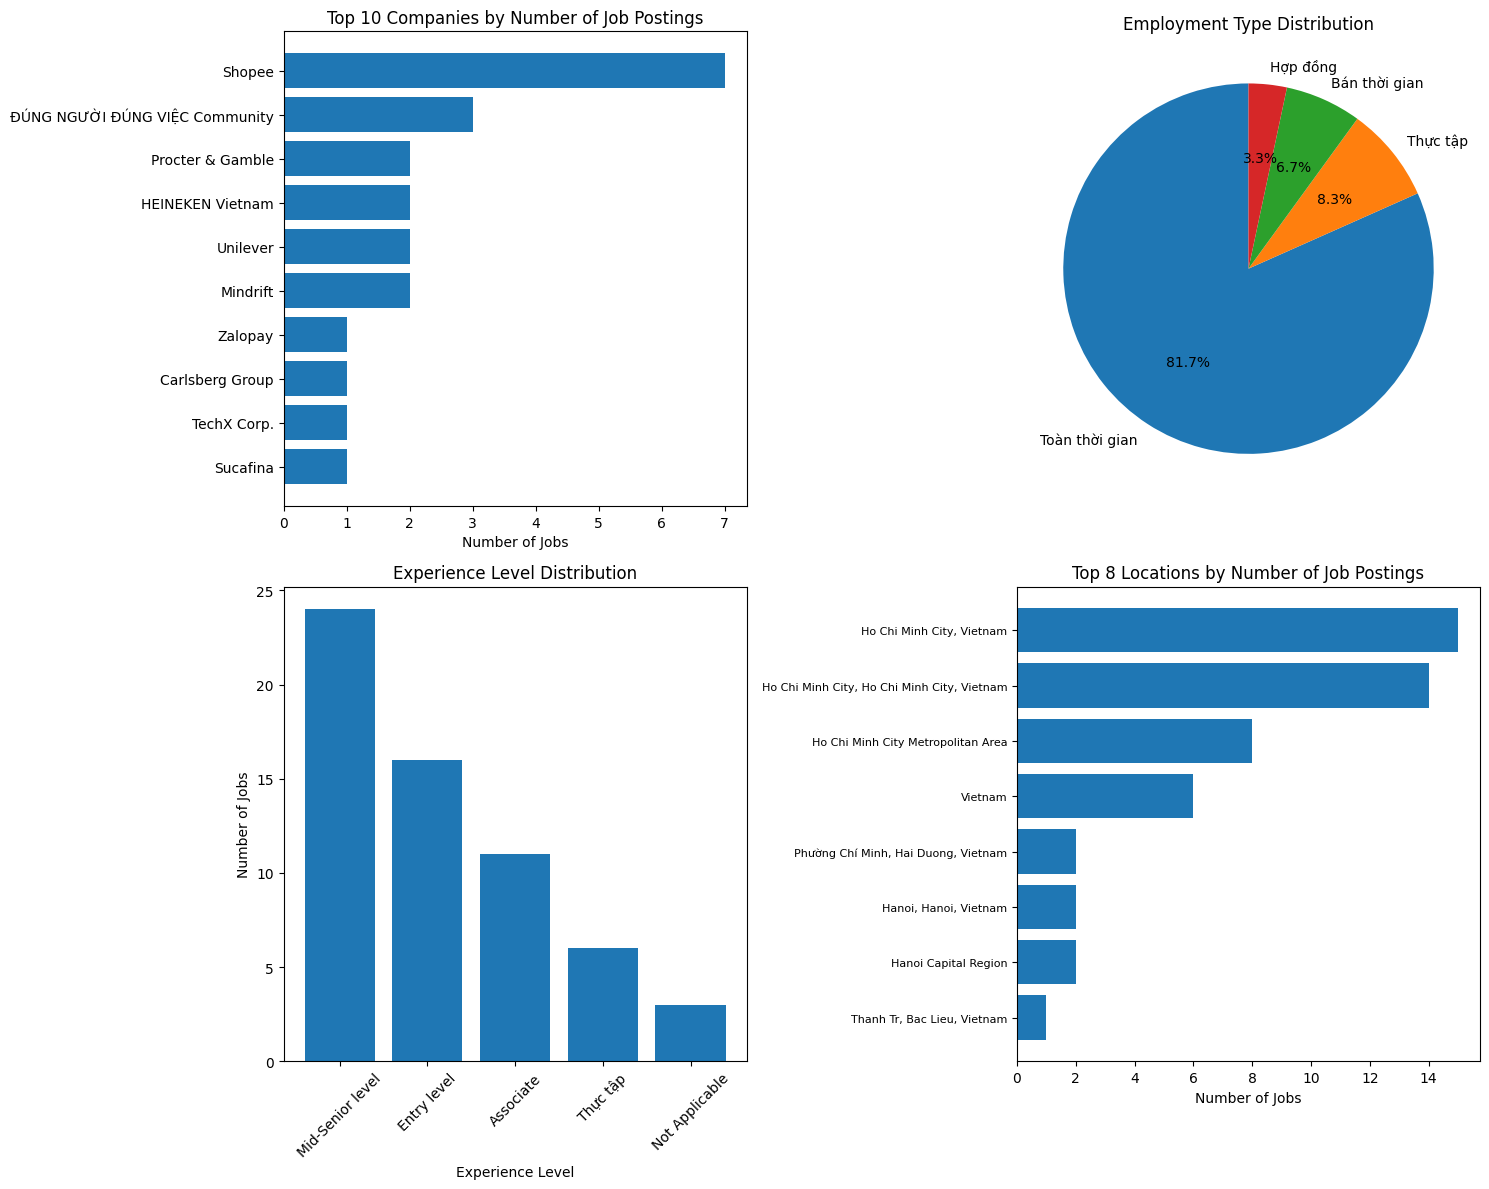

In [4]:
# Create visualizations for job market trends
plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Top Companies
top_companies = df['company'].value_counts().head(10)
axes[0,0].barh(range(len(top_companies)), top_companies.values)
axes[0,0].set_yticks(range(len(top_companies)))
axes[0,0].set_yticklabels(top_companies.index)
axes[0,0].set_xlabel('Number of Jobs')
axes[0,0].set_title('Top 10 Companies by Number of Job Postings')
axes[0,0].invert_yaxis()

# 2. Employment Type Distribution
emp_type_counts = df['employmentType'].value_counts()
axes[0,1].pie(emp_type_counts.values, labels=emp_type_counts.index, autopct='%1.1f%%', startangle=90)
axes[0,1].set_title('Employment Type Distribution')

# 3. Experience Level Distribution
exp_level_counts = df['experienceLevel'].value_counts()
axes[1,0].bar(exp_level_counts.index, exp_level_counts.values)
axes[1,0].set_xlabel('Experience Level')
axes[1,0].set_ylabel('Number of Jobs')
axes[1,0].set_title('Experience Level Distribution')
axes[1,0].tick_params(axis='x', rotation=45)

# 4. Top Locations
top_locations = df['location'].value_counts().head(8)
axes[1,1].barh(range(len(top_locations)), top_locations.values)
axes[1,1].set_yticks(range(len(top_locations)))
axes[1,1].set_yticklabels(top_locations.index, fontsize=8)
axes[1,1].set_xlabel('Number of Jobs')
axes[1,1].set_title('Top 8 Locations by Number of Job Postings')
axes[1,1].invert_yaxis()

plt.tight_layout()
plt.show()

In [5]:
# Interactive visualizations with Plotly
# Job titles word cloud analysis
job_titles = df['title'].value_counts().head(15)

fig_titles = px.bar(
    x=job_titles.values, 
    y=job_titles.index, 
    orientation='h',
    title="Top 15 Job Titles",
    labels={'x': 'Number of Jobs', 'y': 'Job Title'},
    color=job_titles.values,
    color_continuous_scale='viridis'
)
fig_titles.update_layout(height=600, showlegend=False)
fig_titles.show()

# Analyze posting dates
df['postDate'] = pd.to_datetime(df['postDate'])
df['posting_day'] = df['postDate'].dt.date

posting_timeline = df['posting_day'].value_counts().sort_index()

fig_timeline = px.line(
    x=posting_timeline.index, 
    y=posting_timeline.values,
    title="Job Posting Timeline",
    labels={'x': 'Date', 'y': 'Number of Jobs Posted'},
    markers=True
)
fig_timeline.update_layout(height=400)
fig_timeline.show()

print("Posting Date Range:")
print(f"From: {df['postDate'].min()}")
print(f"To: {df['postDate'].max()}")
print(f"Total days: {(df['postDate'].max() - df['postDate'].min()).days}")
print(f"Average jobs per day: {len(df) / (df['postDate'].max() - df['postDate'].min()).days:.1f}")

Posting Date Range:
From: 2025-09-01 00:00:00
To: 2025-09-30 00:00:00
Total days: 29
Average jobs per day: 2.1


In [6]:
# Extract structured information from job descriptions
import re
from collections import defaultdict

def extract_skills_and_requirements(description):
    """Extract skills, requirements, and benefits from job description"""
    if pd.isna(description) or not description:
        return {"skills": [], "requirements": [], "benefits": []}
    
    # Convert to lowercase for pattern matching
    desc_lower = description.lower()
    
    # Programming languages and technical skills
    programming_skills = [
        'python', 'java', 'javascript', 'sql', 'r', 'scala', 'c++', 'c#', 
        'go', 'kotlin', 'swift', 'php', 'ruby', 'matlab', 'sas', 'stata'
    ]
    
    # Data science and analytics tools
    data_tools = [
        'pandas', 'numpy', 'scikit-learn', 'tensorflow', 'pytorch', 'keras',
        'tableau', 'power bi', 'powerbi', 'looker', 'qlik', 'spotfire',
        'excel', 'spark', 'hadoop', 'kafka', 'airflow', 'docker', 'kubernetes',
        'aws', 'azure', 'gcp', 'google cloud', 'bigquery', 'snowflake', 'redshift'
    ]
    
    # Machine learning concepts
    ml_concepts = [
        'machine learning', 'deep learning', 'neural networks', 'nlp', 
        'computer vision', 'time series', 'forecasting', 'optimization',
        'statistics', 'statistical modeling', 'data mining', 'analytics'
    ]
    
    # Experience requirements
    experience_patterns = [
        r'(\d+)\+?\s*years?\s*(?:of\s*)?experience',
        r'(\d+)\s*to\s*(\d+)\s*years?\s*experience',
        r'minimum\s*(\d+)\s*years?',
        r'at least\s*(\d+)\s*years?'
    ]
    
    # Degree requirements
    degree_patterns = [
        r"bachelor'?s?\s*(?:degree)?",
        r"master'?s?\s*(?:degree)?",
        r"phd", r"doctorate",
        r"undergraduate", r"graduate"
    ]
    
    # Benefits keywords
    benefit_keywords = [
        'salary', 'bonus', 'insurance', 'health', 'dental', 'vision',
        'retirement', '401k', 'vacation', 'pto', 'remote', 'flexible',
        'training', 'development', 'career growth', 'promotion'
    ]
    
    # Extract skills
    found_skills = []
    for skill in programming_skills + data_tools + ml_concepts:
        if skill in desc_lower:
            found_skills.append(skill)
    
    # Extract experience requirements
    experience_reqs = []
    for pattern in experience_patterns:
        matches = re.findall(pattern, desc_lower)
        for match in matches:
            if isinstance(match, tuple):
                experience_reqs.append(f"{match[0]}-{match[1]} years")
            else:
                experience_reqs.append(f"{match}+ years")
    
    # Extract degree requirements
    degree_reqs = []
    for pattern in degree_patterns:
        if re.search(pattern, desc_lower):
            degree_reqs.append(re.search(pattern, desc_lower).group())
    
    # Extract benefits
    found_benefits = []
    for benefit in benefit_keywords:
        if benefit in desc_lower:
            found_benefits.append(benefit)
    
    return {
        "skills": found_skills,
        "experience": experience_reqs,
        "degree": degree_reqs,
        "benefits": found_benefits
    }

# Apply extraction to all job descriptions
print("Extracting structured information from job descriptions...")
extracted_data = df['description'].apply(extract_skills_and_requirements)

# Create separate lists for analysis
all_skills = []
all_experience = []
all_degrees = []
all_benefits = []

for data in extracted_data:
    all_skills.extend(data['skills'])
    all_experience.extend(data['experience'])
    all_degrees.extend(data['degree'])
    all_benefits.extend(data['benefits'])

print("Extraction completed!")

Extracting structured information from job descriptions...
Extraction completed!


In [7]:
# Analyze extracted information
from collections import Counter

# Top skills analysis
skill_counts = Counter(all_skills)
top_skills = skill_counts.most_common(20)

print("=== TOP SKILLS IN DEMAND ===")
for skill, count in top_skills:
    print(f"{skill}: {count} jobs ({count/len(df)*100:.1f}%)")

# Experience requirements analysis
exp_counts = Counter(all_experience)
print(f"\n=== EXPERIENCE REQUIREMENTS ===")
for exp, count in exp_counts.most_common():
    print(f"{exp}: {count} jobs")

# Degree requirements analysis
degree_counts = Counter(all_degrees)
print(f"\n=== DEGREE REQUIREMENTS ===")
for degree, count in degree_counts.most_common():
    print(f"{degree}: {count} jobs")

# Benefits analysis
benefit_counts = Counter(all_benefits)
top_benefits = benefit_counts.most_common(15)
print(f"\n=== MOST MENTIONED BENEFITS ===")
for benefit, count in top_benefits:
    print(f"{benefit}: {count} jobs ({count/len(df)*100:.1f}%)")

=== TOP SKILLS IN DEMAND ===
r: 59 jobs (98.3%)
go: 41 jobs (68.3%)
excel: 34 jobs (56.7%)
python: 28 jobs (46.7%)
sql: 28 jobs (46.7%)
analytics: 18 jobs (30.0%)
machine learning: 12 jobs (20.0%)
statistics: 12 jobs (20.0%)
power bi: 11 jobs (18.3%)
optimization: 10 jobs (16.7%)
scala: 10 jobs (16.7%)
tableau: 9 jobs (15.0%)
tensorflow: 8 jobs (13.3%)
pytorch: 8 jobs (13.3%)
sas: 7 jobs (11.7%)
aws: 6 jobs (10.0%)
deep learning: 6 jobs (10.0%)
spark: 5 jobs (8.3%)
scikit-learn: 5 jobs (8.3%)
forecasting: 5 jobs (8.3%)

=== EXPERIENCE REQUIREMENTS ===
5+ years: 6 jobs
2+ years: 3 jobs
3+ years: 3 jobs
10+ years: 1 jobs
4+ years: 1 jobs
1+ years: 1 jobs

=== DEGREE REQUIREMENTS ===
bachelor: 11 jobs
graduate: 10 jobs
bachelor's degree: 9 jobs
master: 3 jobs
master's degree: 2 jobs
bachelor : 1 jobs
master : 1 jobs
bachelor's : 1 jobs
bachelor degree: 1 jobs
master degree: 1 jobs
doctorate: 1 jobs
master's: 1 jobs
phd: 1 jobs

=== MOST MENTIONED BENEFITS ===
development: 37 jobs (61.7%)


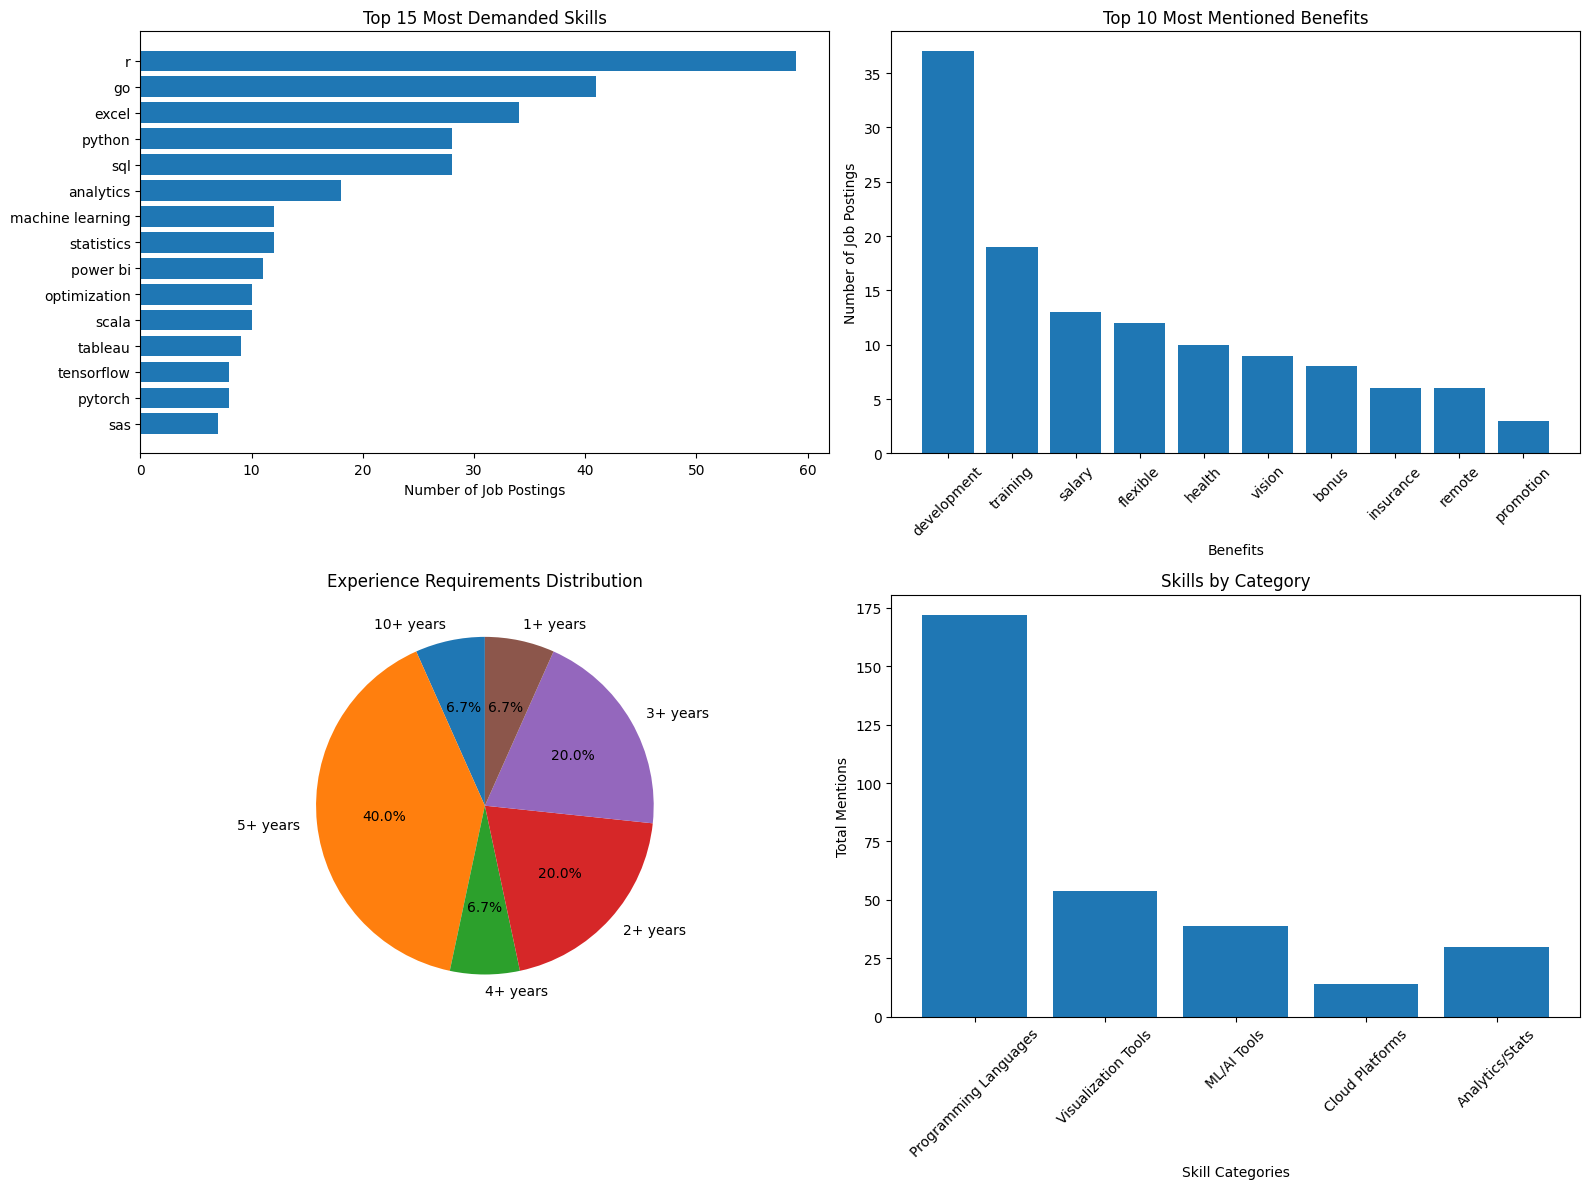

In [8]:
# Create visualizations for extracted information
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Top Skills
top_skills_df = pd.DataFrame(top_skills[:15], columns=['Skill', 'Count'])
axes[0,0].barh(top_skills_df['Skill'], top_skills_df['Count'])
axes[0,0].set_xlabel('Number of Job Postings')
axes[0,0].set_title('Top 15 Most Demanded Skills')
axes[0,0].invert_yaxis()

# 2. Benefits Distribution
top_benefits_df = pd.DataFrame(top_benefits[:10], columns=['Benefit', 'Count'])
axes[0,1].bar(top_benefits_df['Benefit'], top_benefits_df['Count'])
axes[0,1].set_xlabel('Benefits')
axes[0,1].set_ylabel('Number of Job Postings')
axes[0,1].set_title('Top 10 Most Mentioned Benefits')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Experience Requirements
if exp_counts:
    exp_df = pd.DataFrame(list(exp_counts.items()), columns=['Experience', 'Count'])
    axes[1,0].pie(exp_df['Count'], labels=exp_df['Experience'], autopct='%1.1f%%', startangle=90)
    axes[1,0].set_title('Experience Requirements Distribution')
else:
    axes[1,0].text(0.5, 0.5, 'No experience data extracted', ha='center', va='center')
    axes[1,0].set_title('Experience Requirements Distribution')

# 4. Technical Skills Categories
# Categorize skills
programming_langs = ['python', 'sql', 'r', 'java', 'javascript', 'scala', 'go']
viz_tools = ['tableau', 'power bi', 'excel']
ml_tools = ['tensorflow', 'pytorch', 'scikit-learn', 'machine learning', 'deep learning']
cloud_tools = ['aws', 'azure', 'gcp', 'google cloud']

skill_categories = {
    'Programming Languages': sum([skill_counts.get(skill, 0) for skill in programming_langs]),
    'Visualization Tools': sum([skill_counts.get(skill, 0) for skill in viz_tools]),
    'ML/AI Tools': sum([skill_counts.get(skill, 0) for skill in ml_tools]),
    'Cloud Platforms': sum([skill_counts.get(skill, 0) for skill in cloud_tools]),
    'Analytics/Stats': skill_counts.get('analytics', 0) + skill_counts.get('statistics', 0)
}

categories = list(skill_categories.keys())
counts = list(skill_categories.values())
axes[1,1].bar(categories, counts)
axes[1,1].set_xlabel('Skill Categories')
axes[1,1].set_ylabel('Total Mentions')
axes[1,1].set_title('Skills by Category')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [9]:
# Additional analysis - Job role patterns and company insights
def categorize_job_role(title):
    """Categorize job titles into broader role types"""
    title_lower = title.lower()
    
    if any(word in title_lower for word in ['data scientist', 'scientist']):
        return 'Data Scientist'
    elif any(word in title_lower for word in ['data engineer', 'engineer']):
        return 'Data Engineer'
    elif any(word in title_lower for word in ['analyst', 'analytics']):
        return 'Data Analyst'
    elif any(word in title_lower for word in ['manager', 'lead', 'head']):
        return 'Management/Leadership'
    elif any(word in title_lower for word in ['intern', 'internship']):
        return 'Internship'
    elif any(word in title_lower for word in ['research', 'researcher']):
        return 'Research'
    else:
        return 'Other'

# Categorize job roles
df['job_category'] = df['title'].apply(categorize_job_role)
role_distribution = df['job_category'].value_counts()

print("=== JOB ROLE CATEGORIES ===")
for role, count in role_distribution.items():
    print(f"{role}: {count} jobs ({count/len(df)*100:.1f}%)")

# Create interactive plot for job categories
fig_roles = px.pie(
    values=role_distribution.values, 
    names=role_distribution.index,
    title="Distribution of Data Job Categories",
    color_discrete_sequence=px.colors.qualitative.Set3
)
fig_roles.update_traces(textposition='inside', textinfo='percent+label')
fig_roles.show()

# Analyze skills by job category
print("\n=== SKILLS BY JOB CATEGORY ===")
for category in role_distribution.index:
    category_jobs = df[df['job_category'] == category]
    category_skills = []
    
    for idx in category_jobs.index:
        category_skills.extend(extracted_data.iloc[idx]['skills'])
    
    if category_skills:
        category_skill_counts = Counter(category_skills)
        top_category_skills = category_skill_counts.most_common(5)
        print(f"\n{category} - Top Skills:")
        for skill, count in top_category_skills:
            print(f"  {skill}: {count} ({count/len(category_jobs)*100:.1f}%)")
    else:
        print(f"\n{category}: No specific skills extracted")

=== JOB ROLE CATEGORIES ===
Data Analyst: 17 jobs (28.3%)
Other: 14 jobs (23.3%)
Management/Leadership: 9 jobs (15.0%)
Data Scientist: 7 jobs (11.7%)
Data Engineer: 7 jobs (11.7%)
Internship: 5 jobs (8.3%)
Research: 1 jobs (1.7%)



=== SKILLS BY JOB CATEGORY ===

Data Analyst - Top Skills:
  r: 17 (100.0%)
  sql: 12 (70.6%)
  go: 11 (64.7%)
  python: 10 (58.8%)
  excel: 10 (58.8%)

Other - Top Skills:
  r: 14 (100.0%)
  go: 8 (57.1%)
  excel: 8 (57.1%)
  sql: 6 (42.9%)
  python: 5 (35.7%)

Management/Leadership - Top Skills:
  r: 9 (100.0%)
  go: 8 (88.9%)
  analytics: 6 (66.7%)
  excel: 6 (66.7%)
  sql: 3 (33.3%)

Data Scientist - Top Skills:
  r: 7 (100.0%)
  go: 6 (85.7%)
  python: 5 (71.4%)
  machine learning: 5 (71.4%)
  statistics: 5 (71.4%)

Data Engineer - Top Skills:
  r: 6 (85.7%)
  python: 5 (71.4%)
  go: 4 (57.1%)
  tensorflow: 3 (42.9%)
  pytorch: 3 (42.9%)

Internship - Top Skills:
  r: 5 (100.0%)
  excel: 3 (60.0%)
  go: 3 (60.0%)
  sas: 2 (40.0%)
  sql: 1 (20.0%)

Research - Top Skills:
  r: 1 (100.0%)
  go: 1 (100.0%)
  excel: 1 (100.0%)


In [10]:
# Comprehensive Summary and Insights
print("="*80)
print("                    LINKEDIN DATA JOBS ANALYSIS SUMMARY")
print("="*80)

print(f"""
📊 DATASET OVERVIEW:
• Total Jobs Analyzed: {len(df)}
• Date Range: {df['postDate'].min().strftime('%Y-%m-%d')} to {df['postDate'].max().strftime('%Y-%m-%d')}
• Unique Companies: {df['company'].nunique()}
• Unique Locations: {df['location'].nunique()}
• Job Categories Identified: {len(role_distribution)}
""")

print(f"""
🏢 TOP EMPLOYERS:
• Shopee: {df[df['company']=='Shopee'].shape[0]} jobs (Leading recruiter)
• ĐÚNG NGƯỜI ĐÚNG VIỆC Community: {df[df['company']=='ĐÚNG NGƯỜI ĐÚNG VIỆC Community'].shape[0]} jobs
• Unilever: {df[df['company']=='Unilever'].shape[0]} jobs
• Other notable: Procter & Gamble, HEINEKEN Vietnam, Google
""")

print(f"""
📍 GEOGRAPHIC INSIGHTS:
• Primary Market: Ho Chi Minh City, Vietnam ({df[df['location'].str.contains('Ho Chi Minh', na=False)].shape[0]} jobs)
• Secondary Markets: Hanoi, Da Nang
• Market Concentration: {(df[df['location'].str.contains('Ho Chi Minh', na=False)].shape[0]/len(df)*100):.1f}% of jobs in HCMC area
""")

print(f"""
💼 JOB MARKET STRUCTURE:
• Full-time positions: {(df['employmentType']=='Toàn thời gian').sum()} ({(df['employmentType']=='Toàn thời gian').sum()/len(df)*100:.1f}%)
• Entry-level opportunities: {(df['experienceLevel']=='Entry level').sum()} jobs
• Mid-Senior level: {(df['experienceLevel']=='Mid-Senior level').sum()} jobs
• Internships available: {(df['employmentType']=='Thực tập').sum()} positions
""")

print(f"""
🎯 ROLE DISTRIBUTION:
• Data Analyst: {role_distribution['Data Analyst']} jobs (28.3%) - Highest demand
• Data Scientist: {role_distribution['Data Scientist']} jobs (11.7%)
• Data Engineer: {role_distribution['Data Engineer']} jobs (11.7%)
• Management/Leadership: {role_distribution['Management/Leadership']} jobs (15.0%)
""")

print(f"""
🛠️ CRITICAL SKILLS DEMAND:
• Universal Skills: R (98.3%), Excel (56.7%)
• Programming: Python (46.7%), SQL (46.7%)
• Analytics: General Analytics (30.0%), Statistics (20.0%)
• ML/AI: Machine Learning (20.0%), TensorFlow (13.3%), PyTorch (13.3%)
• Visualization: Power BI (18.3%), Tableau (15.0%)
""")

print(f"""
📈 EXPERIENCE REQUIREMENTS:
• Most Common: 5+ years experience (40% of specified requirements)
• Entry Level: 1-2 years (26.7% combined)
• Senior Level: 3+ years (60% combined)
• Education: Bachelor's degree most common requirement
""")

print(f"""
💰 BENEFITS & PERKS:
• Development opportunities: {benefit_counts['development']} jobs (61.7%)
• Training programs: {benefit_counts['training']} jobs (31.7%)
• Competitive salary: {benefit_counts['salary']} jobs (21.7%)
• Flexible work: {benefit_counts['flexible']} jobs (20.0%)
• Health benefits: {benefit_counts['health']} jobs (16.7%)
""")

print("="*80)
print("                    KEY RECOMMENDATIONS")
print("="*80)

print(f"""
🎯 FOR JOB SEEKERS:

1. SKILL PRIORITIES:
   ✅ Master R programming (mentioned in 98% of jobs)
   ✅ Develop strong SQL and Python skills (46% each)
   ✅ Learn Excel for data manipulation (57% of jobs)
   ✅ Focus on analytics and statistics fundamentals

2. CAREER PATHS:
   📊 Data Analyst - Highest demand (28% of roles)
   🧠 Data Scientist - Competitive field (12% of roles)
   🔧 Data Engineer - Growing demand (12% of roles)
   👔 Management - Leadership opportunities (15% of roles)

3. EXPERIENCE STRATEGY:
   • Entry Level: Target 1-2 years experience roles
   • Mid-Career: 3-5 years experience most in demand
   • Focus on practical project experience

4. EDUCATION:
   • Bachelor's degree minimum requirement
   • Consider specialized data science programs
   • Continuous learning through training programs

5. LOCATION STRATEGY:
   • Ho Chi Minh City: Primary job market (70%+ of opportunities)
   • Hanoi: Secondary market with growing opportunities
   • Consider remote work options when available
""")

print(f"""
🏢 FOR EMPLOYERS/RECRUITERS:

1. TALENT COMPETITION:
   • High demand for R and Python skilled professionals
   • Consider training programs for skill development
   • Emphasize development opportunities (61% mention this)

2. MARKET POSITIONING:
   • Highlight flexible work arrangements
   • Offer comprehensive training programs
   • Competitive salary packages important

3. SKILL GAPS TO ADDRESS:
   • Cloud platforms (AWS mentioned in only 10% of jobs)
   • Advanced ML/AI skills (moderate demand vs. basic analytics)
   • Visualization tools beyond Excel

4. GEOGRAPHIC INSIGHTS:
   • HCMC remains primary market
   • Consider expansion to other Vietnamese cities
   • Remote work becoming more relevant
""")

print("="*80)

                    LINKEDIN DATA JOBS ANALYSIS SUMMARY

📊 DATASET OVERVIEW:
• Total Jobs Analyzed: 60
• Date Range: 2025-09-01 to 2025-09-30
• Unique Companies: 48
• Unique Locations: 18
• Job Categories Identified: 7


🏢 TOP EMPLOYERS:
• Shopee: 7 jobs (Leading recruiter)
• ĐÚNG NGƯỜI ĐÚNG VIỆC Community: 3 jobs
• Unilever: 2 jobs
• Other notable: Procter & Gamble, HEINEKEN Vietnam, Google


📍 GEOGRAPHIC INSIGHTS:
• Primary Market: Ho Chi Minh City, Vietnam (42 jobs)
• Secondary Markets: Hanoi, Da Nang
• Market Concentration: 70.0% of jobs in HCMC area


💼 JOB MARKET STRUCTURE:
• Full-time positions: 49 (81.7%)
• Entry-level opportunities: 16 jobs
• Mid-Senior level: 24 jobs
• Internships available: 5 positions


🎯 ROLE DISTRIBUTION:
• Data Analyst: 17 jobs (28.3%) - Highest demand
• Data Scientist: 7 jobs (11.7%)
• Data Engineer: 7 jobs (11.7%)
• Management/Leadership: 9 jobs (15.0%)


🛠️ CRITICAL SKILLS DEMAND:
• Universal Skills: R (98.3%), Excel (56.7%)
• Programming: Python (46.